In [1]:
import numpy as np
import matplotlib.pyplot as plt

from environments import CliffWalkingEnv
from agents.temporal_difference import (
    Sarsa_Agent,
    ExpectedSarsa_Agent,
    QLearning_Agent,
    DoubleQLearning_Agent
)

In [2]:
# matplotlib styles
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 7)

In [3]:
# function for playing until terminal state
def play(env, agent):
    steps = 0
    total_rewards = 0

    done = False
    s = env.reset()
    a = agent.get_action(s)

    while not done:
        t, r, done, _ = env.step(a)
        s, a = agent.learn([s, a, r, t], alpha = 0.5, gamma = 1)

        steps += 1
        total_rewards += r
    else:
        return steps, total_rewards
    

In [4]:
# evaluates avg. episodes lengths and avg. rewards over given training runs
def evaluate(env, agent, runs = 200, episodes = 1000):
    total_episode_steps = []
    total_episode_rewards = []

    for run in range(runs):
        episode_steps = []
        episode_rewards = []

        agent.reset()

        for episode in range(episodes):
            steps, rewards = play(env, agent)
            episode_steps.append(steps)
            episode_rewards.append(rewards)
        
        total_episode_steps.append(episode_steps)
        total_episode_rewards.append(episode_rewards)

    return (np.mean(np.array(total_episode_steps), axis = 0), np.mean(np.array(total_episode_rewards), axis = 0))

In [5]:
# function for plotting agent episode lengths and max updates
def plot_agents(history, limit = None):
    fig, (ax1, ax2) = plt.subplots(1, 2)

    for agent, values in history.items():
        ax1.plot(values['steps'], label = agent)

    ax1.set(xlabel = 'Episodes', ylabel = 'Avg. Steps per Episode')

    if limit is not None:
        ax1.set_ylim([0, limit])
    
    ax1.legend(loc = 'best')

    for agent, values in history.items():
        ax2.plot(values['rewards'], label = agent)

    ax2.set(xlabel = 'Episodes', ylabel = 'Avg. Sum of Rewards per Episode')

    if limit is not None:
        ax2.set_ylim([-limit, 0])

    ax2.legend(loc = 'best')

    plt.show(fig);

In [6]:
# define environment
env = CliffWalkingEnv()

# history dict to store avg. episode lengths and avg. max updates of evaluated agents
history = {}

In [7]:
%%time

# evaluate sarsa agent
agent = Sarsa_Agent(state_space = env.state_space, action_space = env.action_space, epsilon = 0.1)
steps, rewards = evaluate(env = env, agent = agent)

history.update({
    'Sarsa' : {
        'steps' : steps,
        'rewards' : rewards
    }
})

CPU times: user 12min 54s, sys: 4.31 s, total: 12min 58s
Wall time: 12min 58s


In [8]:
%%time

# evaluate q-learning agent
agent = QLearning_Agent(state_space = env.state_space, action_space = env.action_space, epsilon = 0.1)
steps, rewards = evaluate(env = env, agent = agent)

history.update({
    'Q-Learning' : {
        'steps' : steps,
        'rewards' : rewards
    }
})

CPU times: user 13min 51s, sys: 6.38 s, total: 13min 57s
Wall time: 14min 2s


In [9]:
%%time

# evaluate expected sarsa agent
agent = ExpectedSarsa_Agent(state_space = env.state_space, action_space = env.action_space, epsilon = 0.1)
steps, rewards = evaluate(env = env, agent = agent)

history.update({
    'Expected Sarsa' : {
        'steps' : steps,
        'rewards' : rewards
    }
})

CPU times: user 12min 42s, sys: 3.17 s, total: 12min 46s
Wall time: 12min 46s


In [10]:
%%time

# evaluate double q-learning agent
agent = DoubleQLearning_Agent(state_space = env.state_space, action_space = env.action_space, epsilon = 0.1)
steps, rewards = evaluate(env = env, agent = agent)

history.update({
    'Double Q-Learning' : {
        'steps' : steps,
        'rewards' : rewards
    }
})

CPU times: user 12min 20s, sys: 748 ms, total: 12min 21s
Wall time: 12min 21s


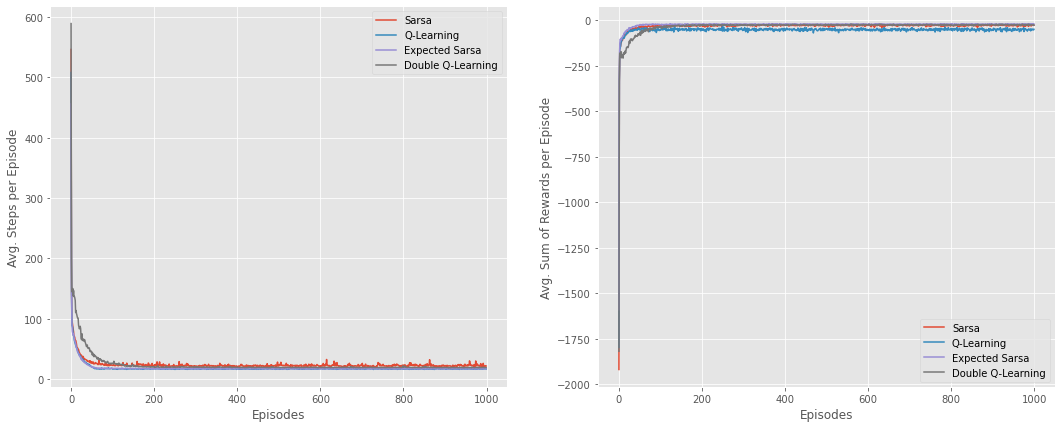

In [11]:
# show avg. steps per episode and avg. total rewards for all agents combined
plot_agents(history)

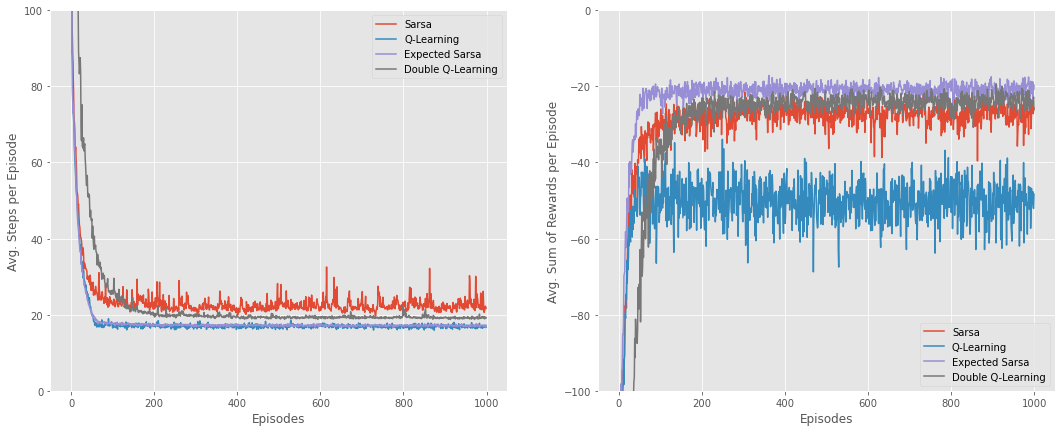

In [12]:
# show avg. steps per episode and avg. total rewards for all agents combined (y-axis limited to 100)
plot_agents(history, limit = 100)